# pip install tensorflow==2.12.*

In [1]:
import os
import cv2
from PIL import Image
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [2]:
path  = './archive/'

names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names)

print("Total number of images is {}".format(len(names)))

Total number of images is 790


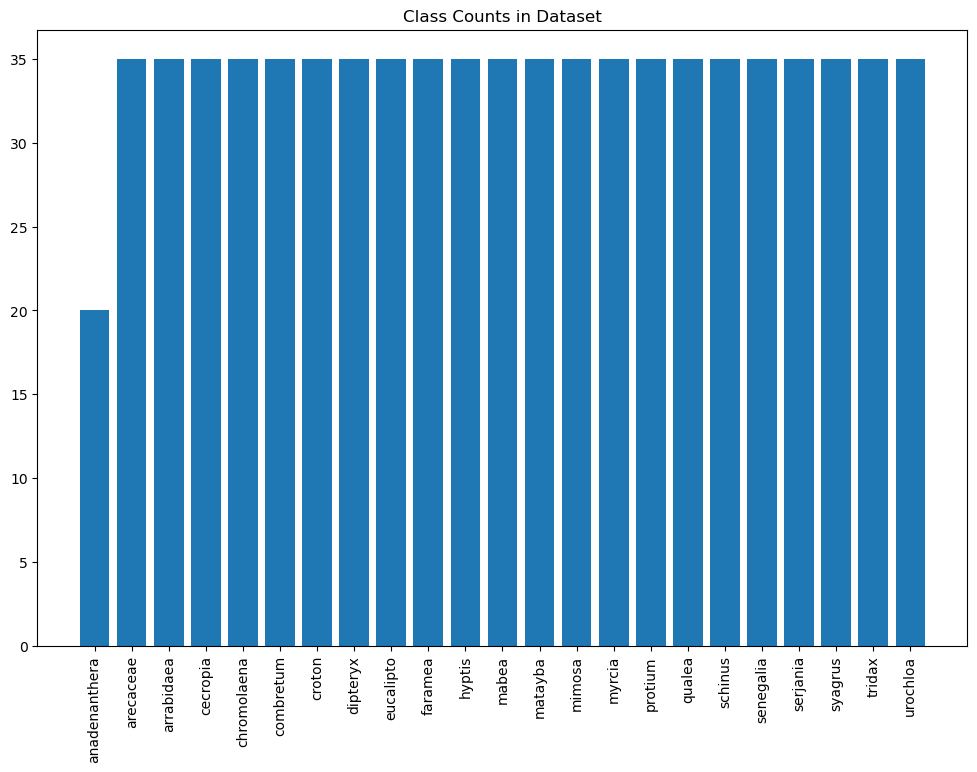

In [3]:
plt.figure(figsize = (12,8))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

In [4]:
path_class  = {key:[] for key in classes.keys()}

for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0]
    path_class[key].append(path + name)

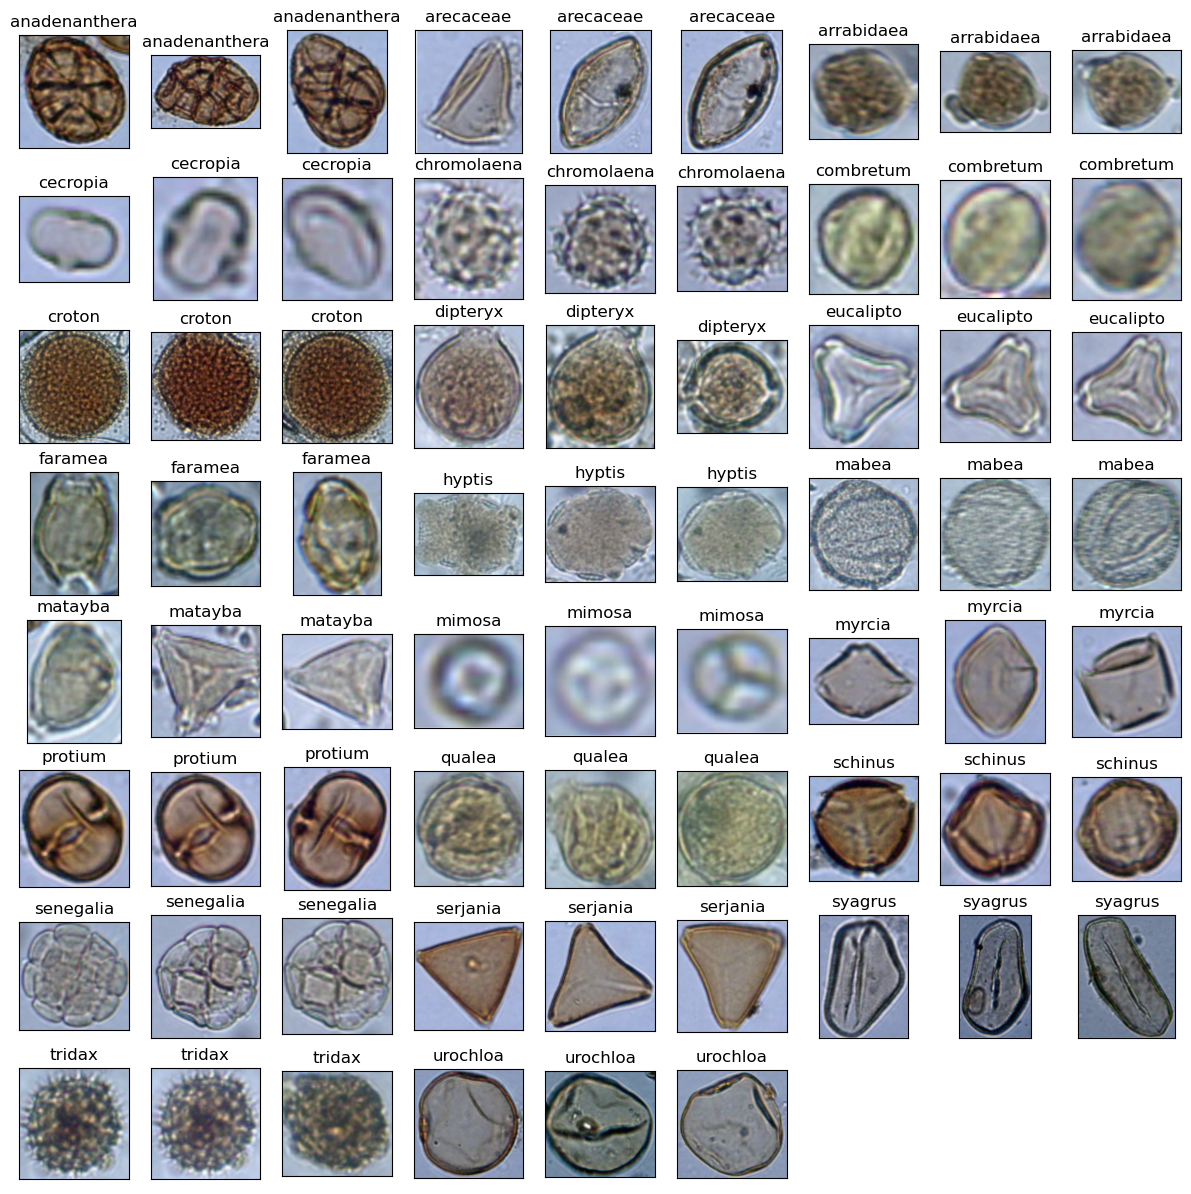

In [5]:
fig = plt.figure(figsize=(15, 15))
for i, key in enumerate(path_class.keys()):
    img1 = Image.open(path_class[key][0]) 
    img2 = Image.open(path_class[key][1]) 
    img3 = Image.open(path_class[key][2]) 

    ax = fig.add_subplot(8, 9,  3*i + 1, xticks=[], yticks=[])
    ax.imshow(img1)
    ax.set_title(key)
    
    ax = fig.add_subplot(8, 9,  3*i + 2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 3, xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

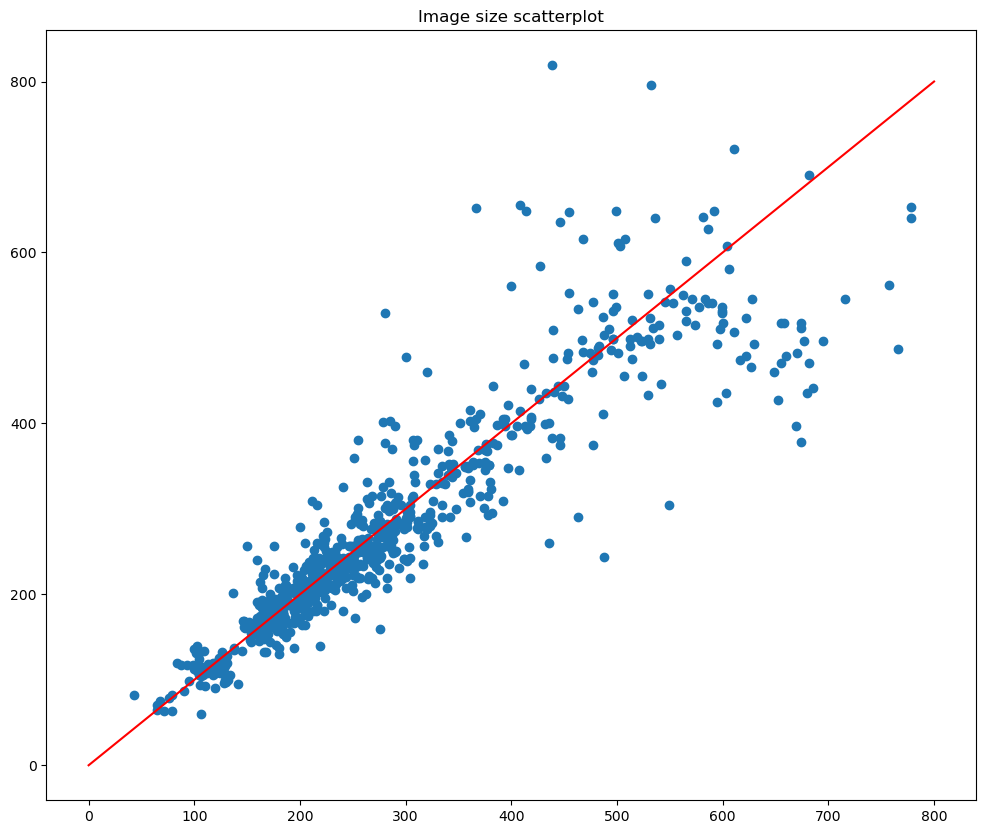

In [6]:
size = [cv2.imread(path + name).shape for name in os.listdir(path)]
x, y, _ = zip(*size)

fig = plt.figure(figsize=(12, 10))

plt.scatter(x,y)
plt.title("Image size scatterplot")

plt.plot([0,800],[0,800], 'r')

In [7]:
def process_img(img, size = (128,128)):
    img = cv2.resize(img, size)  
    img = img/255                   
    return img   

In [8]:
X, Y = [], []
for name  in os.listdir(path):
    img = cv2.imread(path + name)
    X.append(process_img(img))
    Y.append(name.replace(' ', '_').split('_')[0])

X = np.array(X)

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
Y_le = le.fit_transform(Y)
Y_cat = np_utils.to_categorical(Y_le, 23)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_cat, test_size=0.285, stratify=Y_le)
print("Images in each class in Test set: {}".format(np.sum(Y_test, axis =0)))

Images in each class in Test set: [ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [ ]:
input_shape =  X_train[0].shape
output_shape = 23

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, input_shape = input_shape, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64, kernel_size = 2, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128, kernel_size = 2, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(150, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(output_shape, activation = 'softmax'))
model.summary()

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is Compiled!')

Model is Compiled!


In [13]:
datagener = ImageDataGenerator(
                rotation_range= 20,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                horizontal_flip = True,
                vertical_flip = True,)

datagener.fit(X_train)

In [19]:
batch_size = 4
epochs = 120

model_path = 'cnn.hdf5'
callbecks = [EarlyStopping(monitor ='val_loss', patience = 20), 
             ModelCheckpoint(filepath = model_path, save_best_only = True)]


history = model.fit(
        datagener.flow(X_train, Y_train, batch_size=batch_size), 
        batch_size = batch_size, 
        steps_per_epoch = len(X_train) // batch_size,
        epochs = epochs,
        validation_data = (X_train, Y_train),
        callbacks = callbecks,
        verbose = 1)

Epoch 1/120
141/141 [==============================] - 12s 88ms/step - loss: 1.3717 - accuracy: 0.5106 - val_loss: 1.7194 - val_accuracy: 0.4379
Epoch 2/120
141/141 [==============================] - 13s 92ms/step - loss: 1.3313 - accuracy: 0.5035 - val_loss: 1.0683 - val_accuracy: 0.6028
Epoch 3/120
141/141 [==============================] - 13s 89ms/step - loss: 1.2561 - accuracy: 0.5567 - val_loss: 1.1990 - val_accuracy: 0.5904
Epoch 4/120
141/141 [==============================] - 13s 92ms/step - loss: 1.2589 - accuracy: 0.5691 - val_loss: 0.8959 - val_accuracy: 0.6684
Epoch 5/120
141/141 [==============================] - 12s 88ms/step - loss: 1.2175 - accuracy: 0.5745 - val_loss: 0.8332 - val_accuracy: 0.7110
Epoch 6/120
141/141 [==============================] - 13s 89ms/step - loss: 1.2401 - accuracy: 0.5816 - val_loss: 0.8448 - val_accuracy: 0.6844
Epoch 7/120
141/141 [==============================] - 12s 86ms/step - loss: 1.1746 - accuracy: 0.5745 - val_loss: 0.9259 - val_ac

141/141 [==============================] - 11s 79ms/step - loss: 0.6510 - accuracy: 0.8138 - val_loss: 0.3172 - val_accuracy: 0.9113
Epoch 114/120
141/141 [==============================] - 11s 78ms/step - loss: 0.7322 - accuracy: 0.7890 - val_loss: 0.2413 - val_accuracy: 0.9043
Epoch 115/120
141/141 [==============================] - 11s 79ms/step - loss: 0.7778 - accuracy: 0.7748 - val_loss: 0.4028 - val_accuracy: 0.8777
Epoch 116/120
141/141 [==============================] - 11s 79ms/step - loss: 0.6510 - accuracy: 0.8121 - val_loss: 0.1810 - val_accuracy: 0.9362
Epoch 117/120
141/141 [==============================] - 11s 78ms/step - loss: 0.6343 - accuracy: 0.8174 - val_loss: 0.4839 - val_accuracy: 0.8475
Epoch 118/120
141/141 [==============================] - 11s 78ms/step - loss: 0.6918 - accuracy: 0.8103 - val_loss: 0.2530 - val_accuracy: 0.9184
Epoch 119/120
141/141 [==============================] - 11s 78ms/step - loss: 0.7608 - accuracy: 0.7979 - val_loss: 0.3409 - val_ac

In [20]:
model.load_weights(model_path)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test set accuracy: {}'.format(score[1]))

Test set accuracy: 0.8805309534072876


8/8 [==============================] - 0s 37ms/step


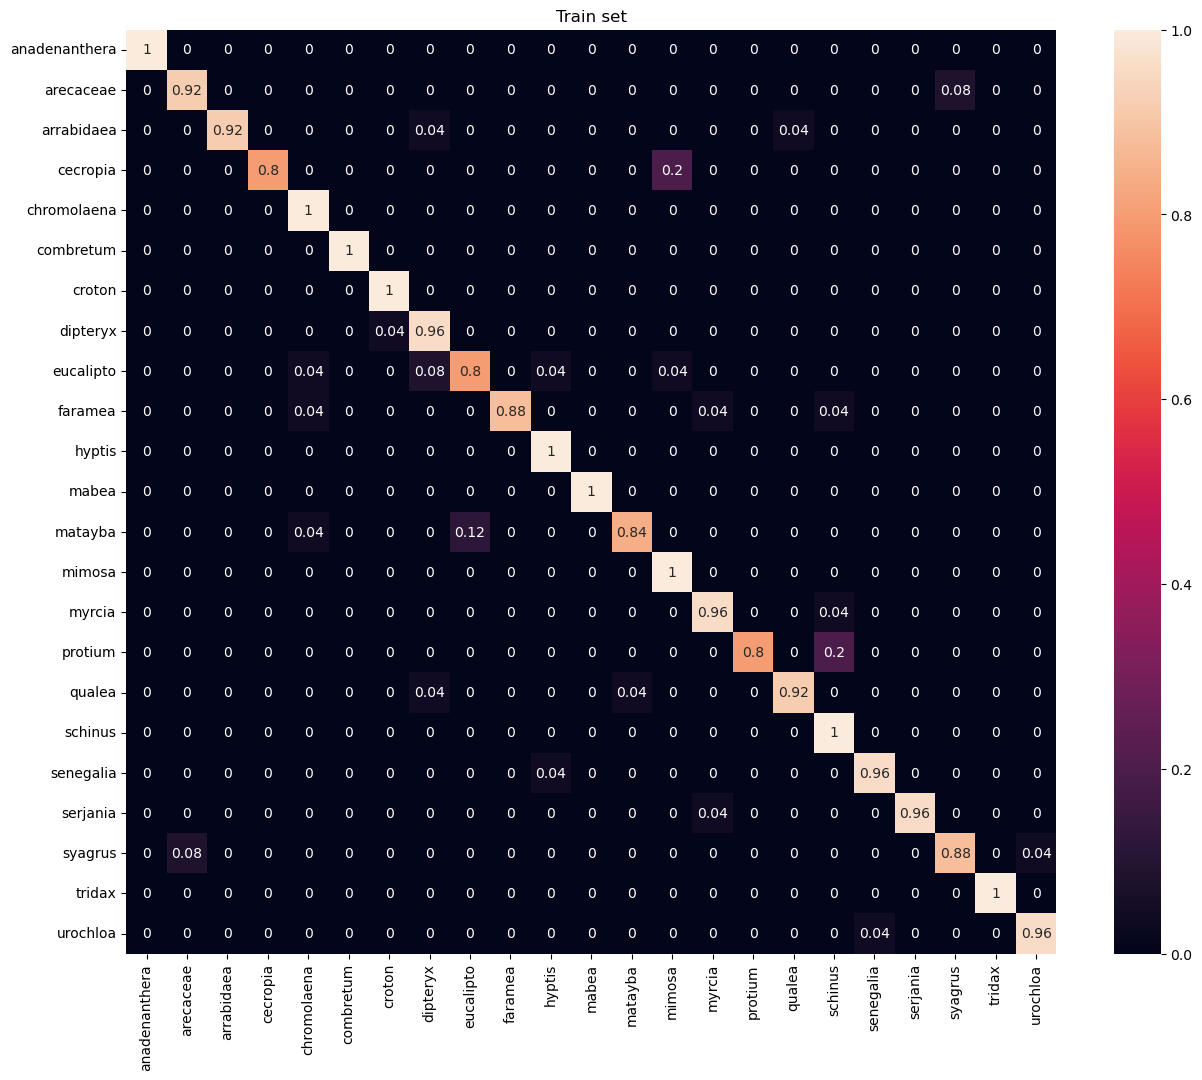

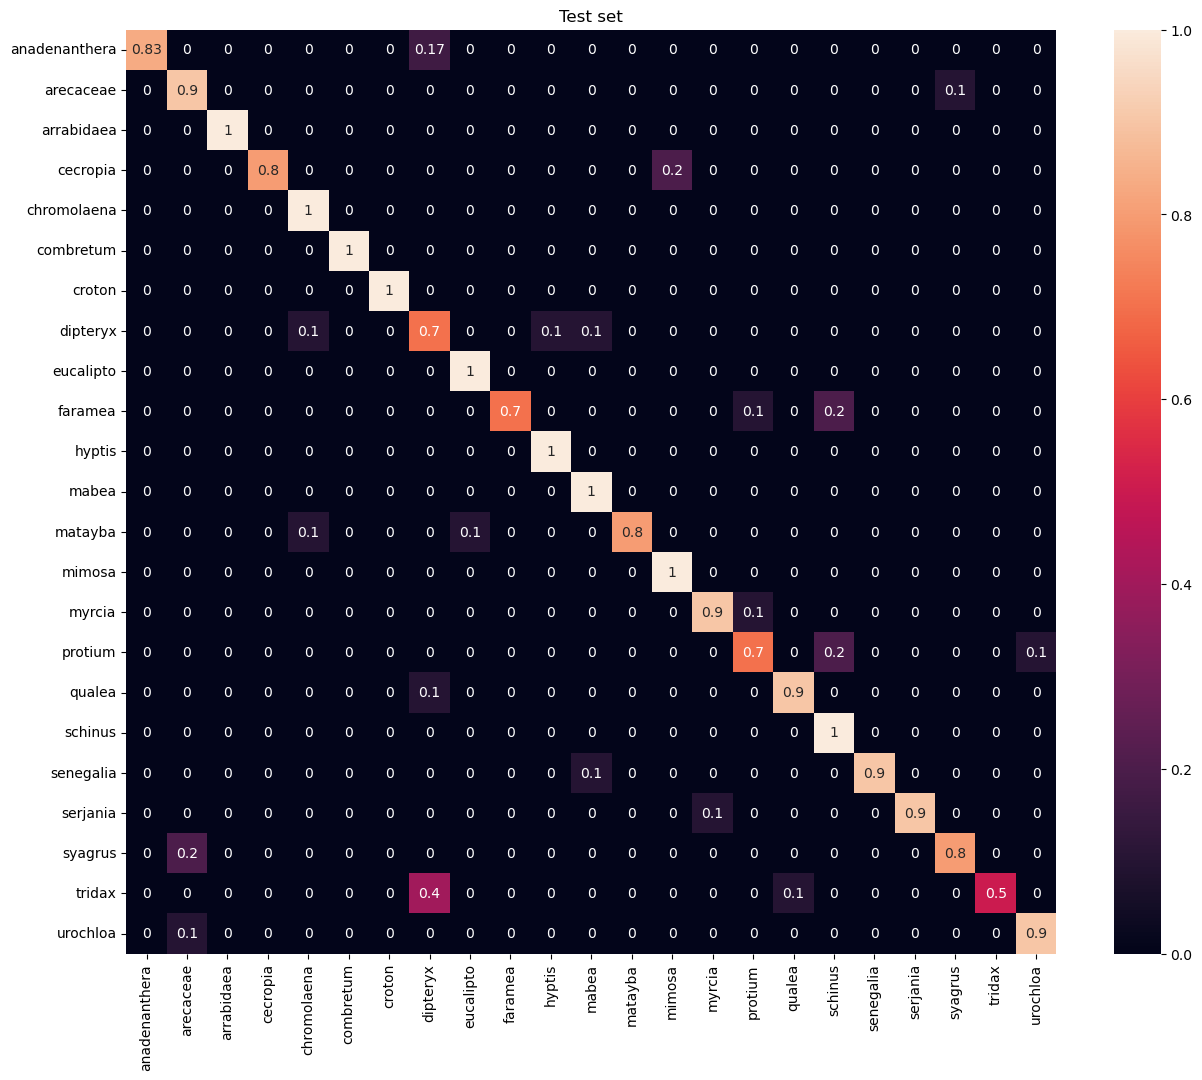

In [21]:
def plot_confusion_matrix(model, x, y, plot_title = ''):
    y_pred = model.predict(x)                            
    predicted_categories = tf.argmax(y_pred, axis=1)     
    true_categories = tf.argmax(y, axis=1)     
    
    cm = confusion_matrix(true_categories, predicted_categories)
    
    df_cm = pd.DataFrame(cm, index = le.classes_ ,  columns = le.classes_)
    
    df_cm = df_cm.div(df_cm.sum(axis=1), axis=0)
    
    plt.figure(figsize = (15,12))
    plt.title(plot_title)
    sns.heatmap(df_cm, annot=True)
    
plot_confusion_matrix(model, X_train, Y_train, "Train set")
plot_confusion_matrix(model, X_test,  Y_test,  "Test set")

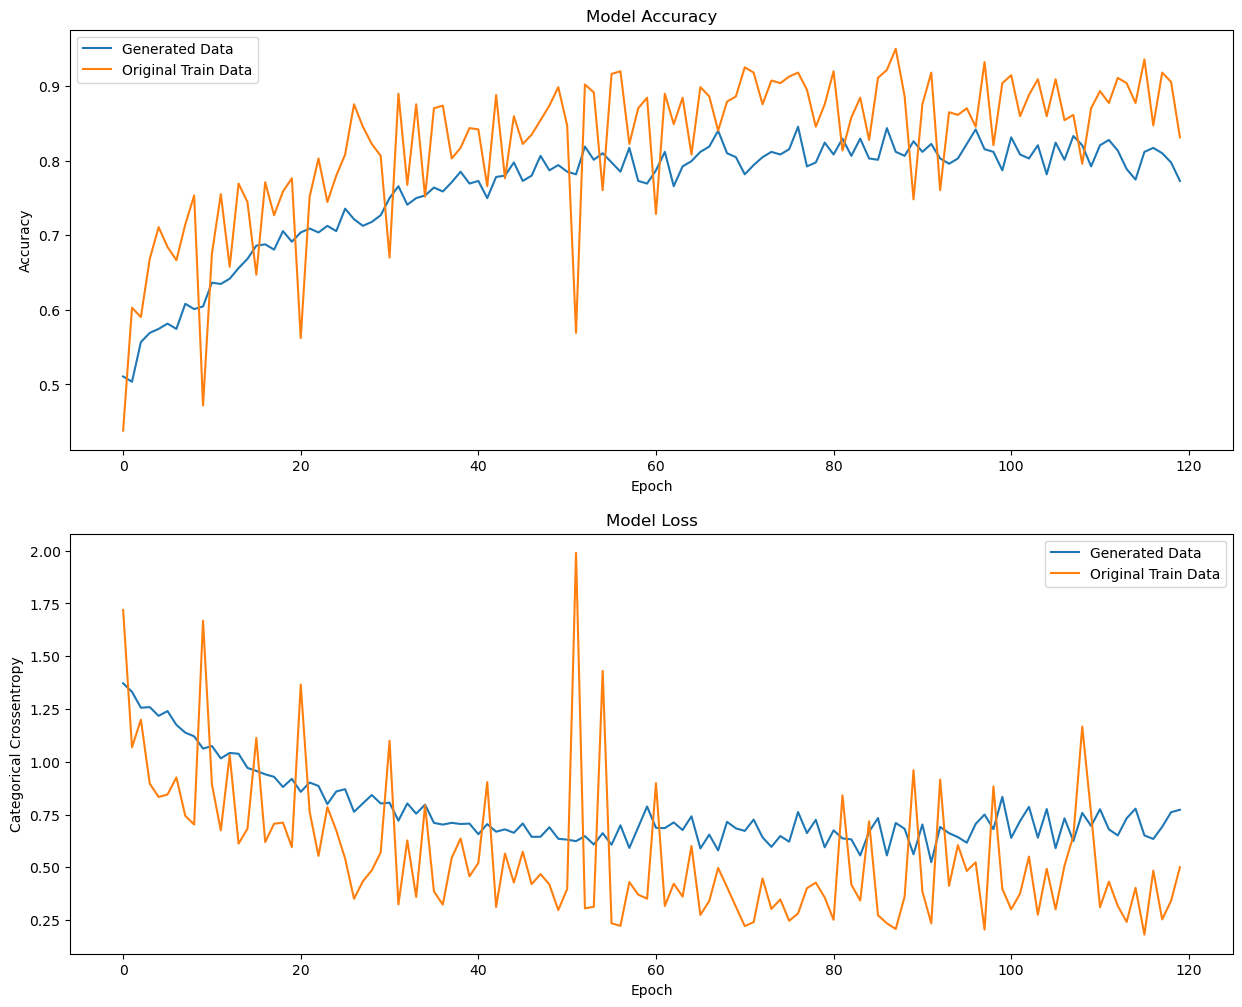

In [22]:
plt.figure(figsize = (15,12))     
   
plt.subplot(211)  
plt.title('Model Accuracy')  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Generated Data', 'Original Train Data'], loc='best')  
      
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Categorical Crossentropy')  
plt.xlabel('Epoch')  
plt.legend(['Generated Data', 'Original Train Data'], loc='best')  
plt.show()

In [5]:
model.save('pollen_CV.h5')

NameError: name 'model' is not defined